We will start by importing the data file.

In [1]:

from google.colab import files
uploaded = files.upload()


Saving data.csv to data.csv


Next we will load the csv file, display the first 5 rows and show basic description.

In [15]:

import pandas as pd
df = pd.read_csv('data.csv')
print(df.head())
print(df.describe())


   Duration  Pulse  Maxpulse  Calories
0        60    110       130     409.1
1        60    117       145     479.0
2        60    103       135     340.0
3        45    109       175     282.4
4        45    117       148     406.0
         Duration       Pulse    Maxpulse     Calories
count  169.000000  169.000000  169.000000   164.000000
mean    63.846154  107.461538  134.047337   375.790244
std     42.299949   14.510259   16.450434   266.379919
min     15.000000   80.000000  100.000000    50.300000
25%     45.000000  100.000000  124.000000   250.925000
50%     60.000000  105.000000  131.000000   318.600000
75%     60.000000  111.000000  141.000000   387.600000
max    300.000000  159.000000  184.000000  1860.400000


Next, check for the null values.

In [16]:


print(df.isnull().sum())

Duration    0
Pulse       0
Maxpulse    0
Calories    5
dtype: int64


Next, replace the null values by the mean of each coloumn.

In [17]:
df.fillna(df.mean(), inplace=True)

Next, take aggregates.

In [18]:
aggregation = df[['Calories', 'Pulse']].agg(['min', 'max', 'count', 'mean'])
print(aggregation)


          Calories       Pulse
min      50.300000   80.000000
max    1860.400000  159.000000
count   169.000000  169.000000
mean    375.790244  107.461538


Next, filter rows where calories are in between 500-1000

In [19]:
filtered_df = df[(df['Calories'] >= 500) & (df['Calories'] <= 1000)]
print(filtered_df)

     Duration  Pulse  Maxpulse  Calories
51         80    123       146     643.1
62        160    109       135     853.0
65        180     90       130     800.4
66        150    105       135     873.4
67        150    107       130     816.0
72         90    100       127     700.0
73        150     97       127     953.2
75         90     98       125     563.2
78        120    100       130     500.4
83        120    100       130     500.0
90        180    101       127     600.1
99         90     93       124     604.1
101        90     90       110     500.0
102        90     90       100     500.0
103        90     90       100     500.4
106       180     90       120     800.3
108        90     90       120     500.3


Next, filter rows where calories is greater than 500 and pulse is less than 100

In [20]:
filtered_df2 = df[(df['Calories'] > 500) & (df['Pulse'] < 100)]
print(filtered_df2)

     Duration  Pulse  Maxpulse  Calories
65        180     90       130     800.4
70        150     97       129    1115.0
73        150     97       127     953.2
75         90     98       125     563.2
99         90     93       124     604.1
103        90     90       100     500.4
106       180     90       120     800.3
108        90     90       120     500.3


Next, create a new dataframe excluding the 'maxpulse' column.

In [21]:
df_modified = df.drop(columns=['Maxpulse'])
print(df_modified.head())

   Duration  Pulse  Calories
0        60    110     409.1
1        60    117     479.0
2        60    103     340.0
3        45    109     282.4
4        45    117     406.0


Next, drop the 'maxpulse' column from the original dataframe

In [22]:
df.drop(columns=['Maxpulse'], inplace=True)
print(df.head())


   Duration  Pulse  Calories
0        60    110     409.1
1        60    117     479.0
2        60    103     340.0
3        45    109     282.4
4        45    117     406.0


Next, convert calories to int datatype

In [23]:
df['Calories'] = df['Calories'].astype(int)
print(df.dtypes)  # Check the datatype of each column

Duration    int64
Pulse       int64
Calories    int64
dtype: object


Installing matplotlib via pip package installer

In [13]:


pip install matplotlib

Next, create a scatterplot for duration and calories.

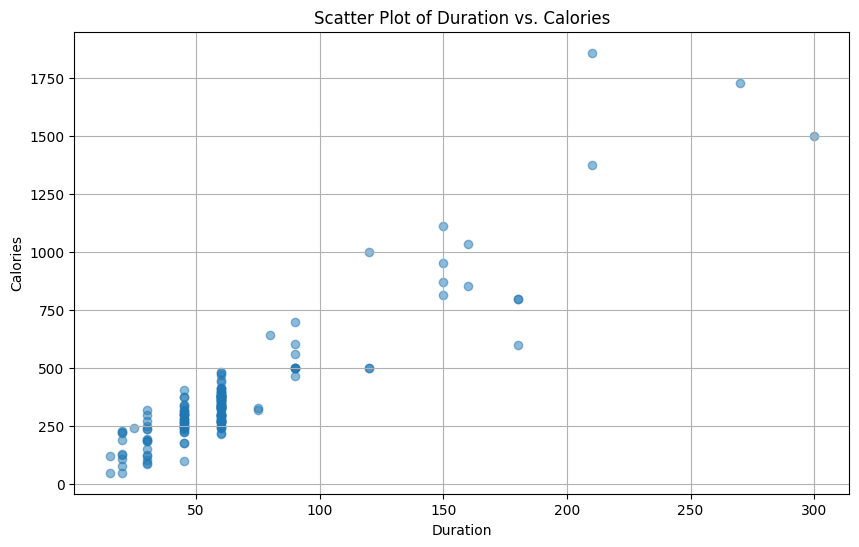

In [24]:

import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(df['Duration'], df['Calories'], alpha=0.5)
plt.title('Scatter Plot of Duration vs. Calories')
plt.xlabel('Duration')
plt.ylabel('Calories')
plt.grid(True)
plt.show()


**Question 2**

Import salary data file

In [27]:

from google.colab import files
uploaded = files.upload()

Saving Salary_Data (2) (1) (1).csv to Salary_Data (2) (1) (1) (1).csv


Load the csv file and display first 5 columns

In [28]:
df = pd.read_csv('Salary_Data (2) (1) (1).csv')
print(df.head())

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0


Assuming 'yearsexperience' is the feature and 'salary' is the target we will split the data in 1:3 ratio for testing and 2:3 ratio for training

In [30]:
from sklearn.model_selection import train_test_split

X = df[['YearsExperience']]  # Features
y = df['Salary']              # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)

print(f"Training data size: {len(X_train)}")
print(f"Test data size: {len(X_test)}")

Training data size: 20
Test data size: 10


Next, we will create and train model and make prediction.

In [33]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

Calculate mean squared error for train and test data.

In [34]:
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f"Mean Squared Error (Train): {mse_train}")
print(f"Mean Squared Error (Test): {mse_test}")


Mean Squared Error (Train): 29793161.082422983
Mean Squared Error (Test): 35301898.887134895


Next, we will plot training data and test data

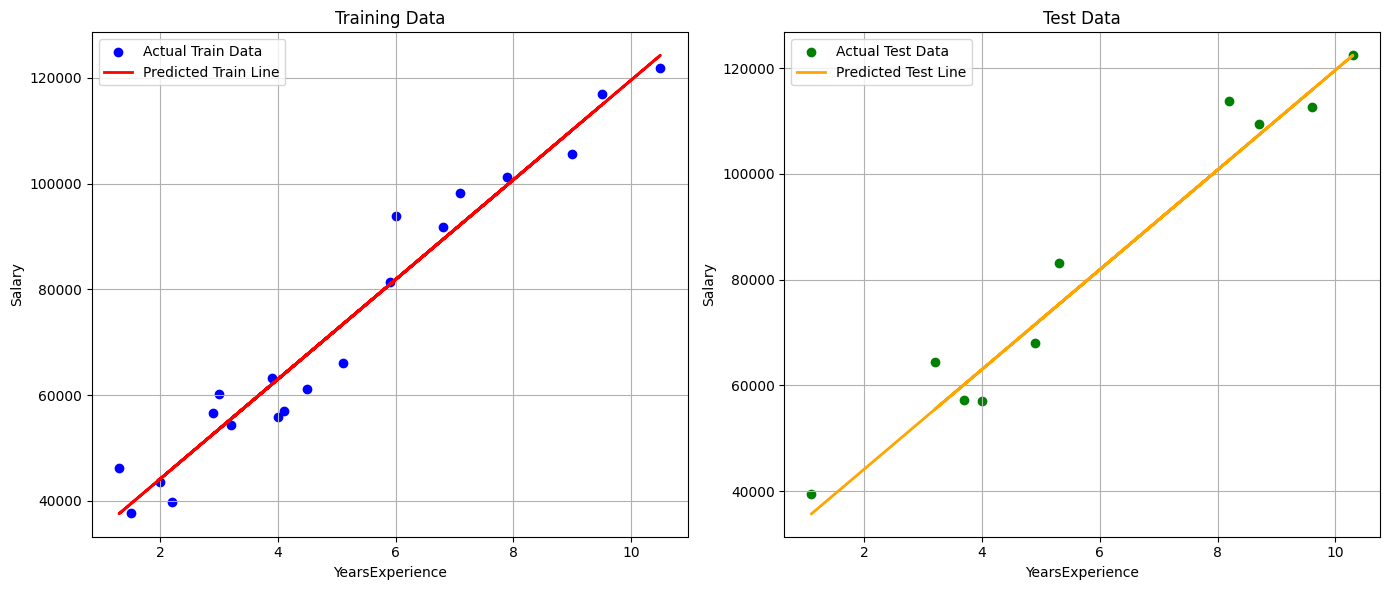

In [35]:

import matplotlib.pyplot as plt

# Plot training data and predictions
plt.figure(figsize=(14, 6))

# Training data
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='blue', label='Actual Train Data')
plt.plot(X_train, y_pred_train, color='red', linewidth=2, label='Predicted Train Line')
plt.title('Training Data')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)

# Test data
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='green', label='Actual Test Data')
plt.plot(X_test, y_pred_test, color='orange', linewidth=2, label='Predicted Test Line')
plt.title('Test Data')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()